In [16]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean as cm
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
from dask.distributed import Client
import dask
import os

client =Client()



def format_3daxis(ax,lims):
    ax.patch.set_alpha(0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(3))
    
    xmin,xmax,ymin,ymax,zmin, zmax = lims
    
    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # Plot edges
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)

    #ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
    #ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
    #ax.plot([xmin, xmin], [ymin, ymax], 0, **edges_kw)
    #ax.plot([xmin, xmax], [ymax, ymax], 0, **edges_kw)
    
    ax.plot([xmax, xmax], [0, ymax], 5, **edges_kw)
    ax.plot([xmin, xmax], [0, 0], 5, **edges_kw)
    ax.plot([xmin, xmin], [0, ymax], 5, **edges_kw)
    ax.plot([xmin, xmax], [ymax, ymax], 5, **edges_kw)
    ax.plot([xmax, xmax], [0, 0], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [0, 0], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmax], [0, 0], [zmin, zmin], **edges_kw)

    # Set labels and zticks
    ax.set(
        xlabel='X [km]',
        ylabel='Y [km]',
        zlabel='Depth [m]',
#         zticks=[0, -50, -100, -150],
    )

    # Set zoom and angle view
    ax.view_init(40, -60)
    ax.set_box_aspect((1,1,0.6), zoom=0.9)
    
def contour_rasterize(contour):
    for pathcoll in contour.collections:
        pathcoll.set_rasterized(True)

def axis_to_fig(axis):
    fig = axis.figure
    def transform(coord):
        return fig.transFigure.inverted().transform(
            axis.transAxes.transform(coord))
    return transform

def add_sub_axes(axis, rect,**kwargs):
    fig = axis.figure
    left, bottom, width, height = rect
    trans = axis_to_fig(axis)
    figleft, figbottom = trans((left, bottom))
    figwidth, figheight = trans([width,height]) - trans([0,0])
    return fig.add_axes([figleft, figbottom, figwidth, figheight],**kwargs)

def myfmt(x, pos):
    return '{0:.2f}'.format(x)


def remove_empty_ds(ds):
    filename = (ds.encoding['source'])
    print(ds.time)
    if len(ds.time)==0:
        print(filename)
    return ds


def load_format_data(path, var, isel, transpose=["yF","xF","zC"]):
    data = xr.open_mfdataset(file_paths)
    var = data[var].isel(isel).transpose(*transpose)
    return var

def format_data(data, var, isel,transpose=["yF","xF","zC"]):
    var = data[var].isel(isel).transpose(*transpose)
    return var

def plot3D(ax, X, Y, Z, var, kw):
    
    # Plot contour surfaces
    
    
    #half domain
    icut=int(var.shape[0]/2.)
    
    _t = ax.contourf(
        X[icut:, :, -1], Y[icut:, :, -1], var[icut:, :, -1].values,
        zdir='z', offset=0, **kw 
    )
    
    
    _r = ax.contourf(
        X[icut, :, :], var[icut, :, :].values, Z[icut, :, :],
        zdir='y', offset=0, **kw
    )
    
    C = ax.contourf(
        var[icut:, -1, :].values, Y[icut:, -1, :], Z[icut:, -1, :],
        zdir='x', offset=X.max(), **kw
    )
    
    #the full box:
    
    #_t = ax.contourf(
    #    X[:, :, -1], Y[:, :, -1], var[:, :, -1].values,
    #    zdir='z', offset=0, **kw 
    #)
    
    #_r = ax.contourf(
    #    X[0, :, :], var[0, :, :].values, Z[0, :, :],
    #    zdir='y', offset=Y.min(), **kw
    #)
    #C = ax.contourf(
    #    var[:, -1, :].values, Y[:, -1, :], Z[:, -1, :],
    #    zdir='x', offset=X.max(), **kw
    #)


   
    # Set limits of the plot from coord limits
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()
    zmin, zmax = Z.min(), Z.max()
    
    lims = (xmin, xmax, ymin, ymax, zmin, zmax) 
    format_3daxis(ax,lims)
    
    return _t


def coriolis_frequency(latitude_degrees):
    import math
    omega = 7.2921e-5  # Earth's angular velocity (rad/s)
    phi_rad = math.radians(latitude_degrees)
    f0 = 2 * omega * math.sin(phi_rad)
    return f0

In [20]:

data_path = "/home/datawork-lops-osi/cdemarez/5_SECTION19/ICE-EDDY_wJ/V2/RUN/AC-0"

lat=80
f0=coriolis_frequency(lat);print(f0)

vel_fields = "vel_fields*.nc"
tracer_fields = "tracer_fields*.nc"
vel_fields_paths = '{0}/{1}'.format(data_path, vel_fields)
tracer_fields_paths = '{0}/{1}'.format(data_path, tracer_fields)

data = xr.open_mfdataset(vel_fields_paths)# preprocess=remove_empty_ds )

0.00014362633231480645


getfattr: /home/datawork-lops-osi/cdemarez/5_SECTION19/ICE-EDDY_wJ/V1/RUN/test4_HR/vel_fields.nc: Operation not supported


getfattr: /home/datawork-lops-osi/cdemarez/5_SECTION19/ICE-EDDY_wJ/V1/RUN/test4_HR/vel_fields.nc: Operation not supported
getfattr: /home/datawork-lops-osi/cdemarez/5_SECTION19/ICE-EDDY_wJ/V1/RUN/test4_HR/vel_fields.nc: Operation not supported
getfattr: /home/datawork-lops-osi/cdemarez/5_SECTION19/ICE-EDDY_wJ/V1/RUN/test4_HR/vel_fields.nc: Operation not supported


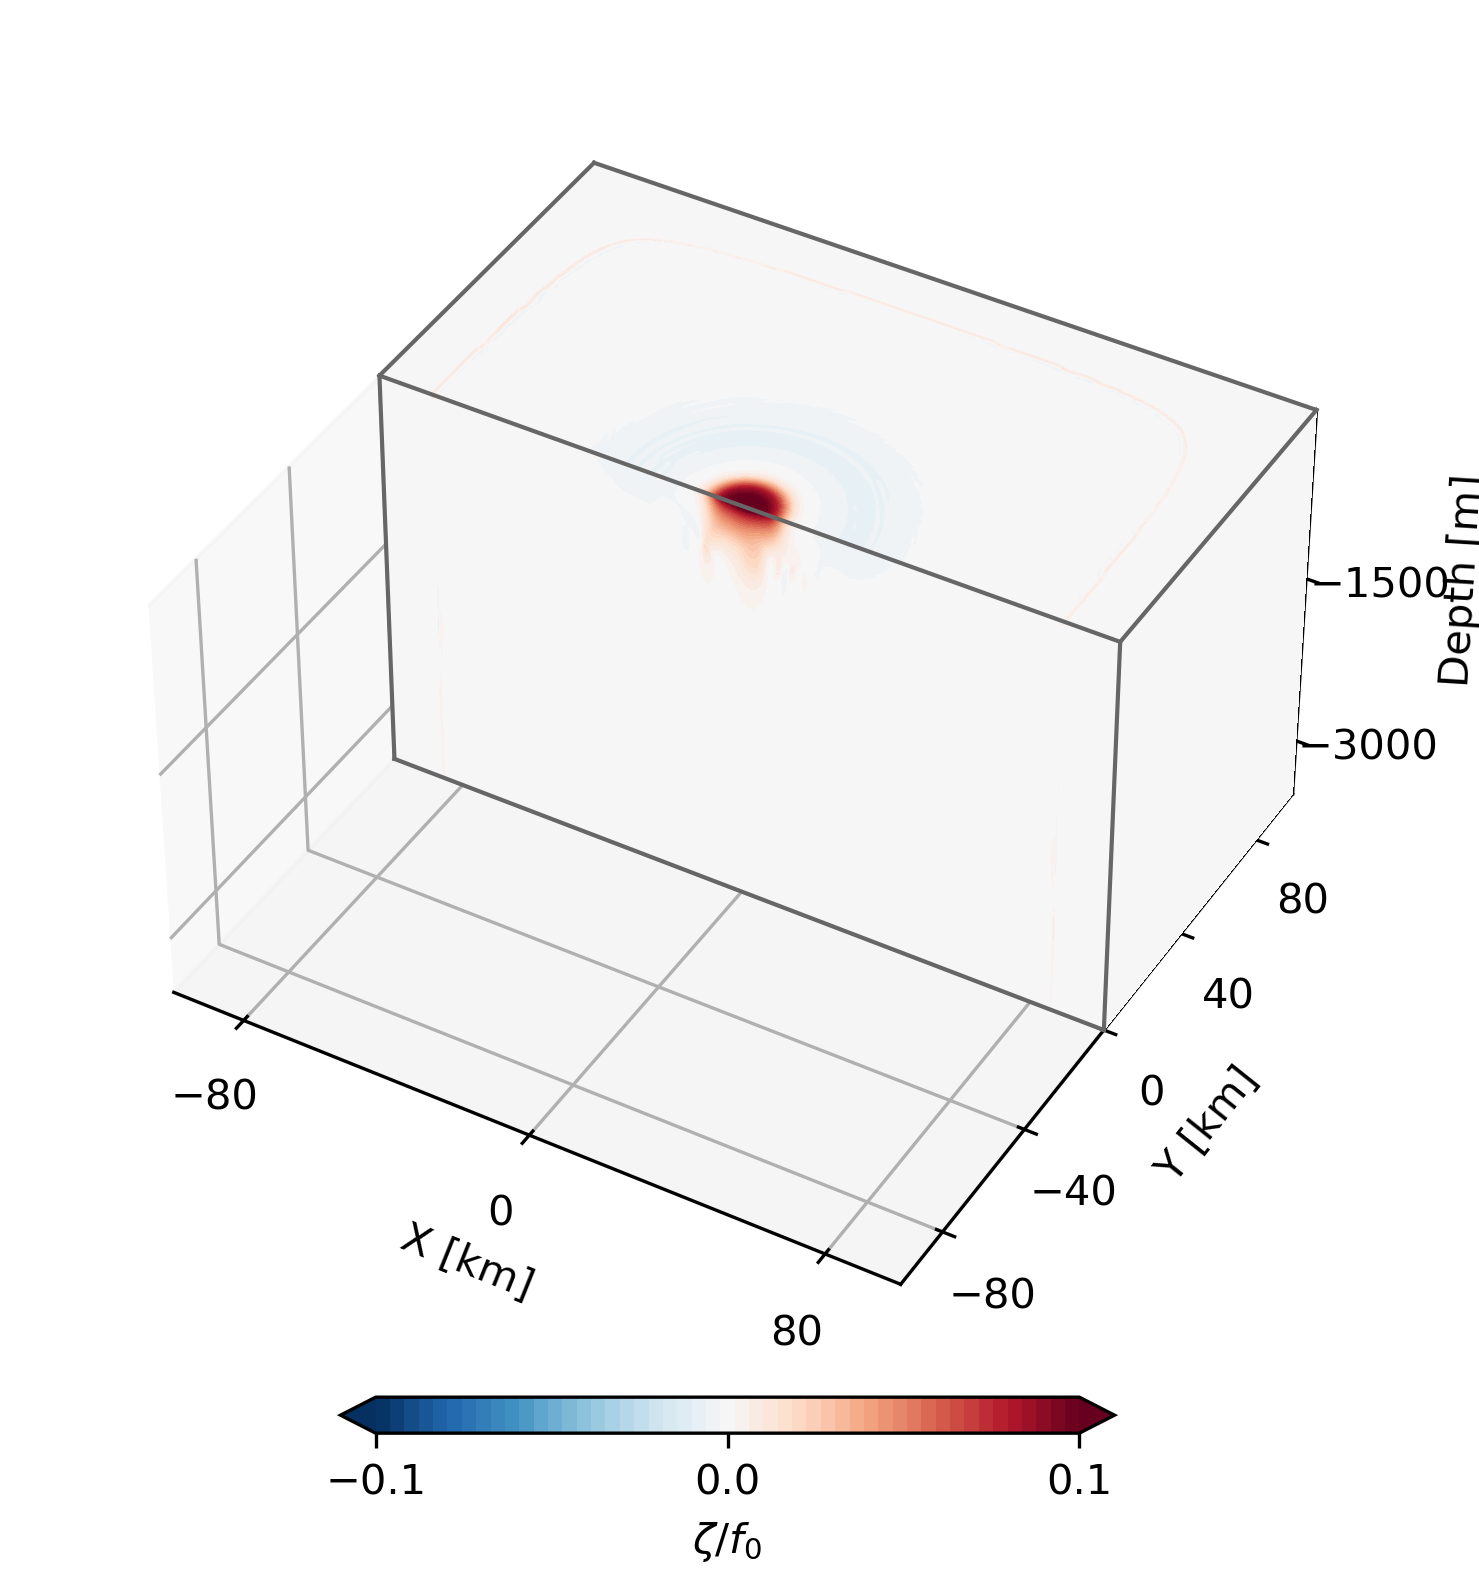

In [21]:
vmax=0.1
vmin=-vmax

kw = {
    'vmin': vmin,
    'vmax': vmax,
    'levels': np.linspace(vmin,vmax,50),
    'cmap': 'RdBu_r',
    'extend':'both'
}


var = data.vort.isel(time=150).transpose("yF","xF","zC")

Ny, Nx, Nz = var.shape

X = np.ones((Ny,Nx,Nz)) * var.xF.values[np.newaxis,:,np.newaxis] / 1000
Y = np.ones((Ny,Nx,Nz)) * var.yF.values[:, np.newaxis,np.newaxis] / 1000
Z = np.ones((Ny,Nx,Nz)) * var.zC.values[np.newaxis,np.newaxis,:]


# Create a figure with 3D ax
fig = plt.figure(figsize=(6, 6),dpi=300)
gs = GridSpec(1, 1, figure=fig)
########################################################################
ax1 = fig.add_subplot(gs[0, 0], projection='3d', computed_zorder=False)
cbar = plot3D(ax1, X, Y, Z, var/f0, kw)
plt.subplots_adjust(hspace=0.25, wspace=-0.35)
cax = fig.add_axes([0.3, 0.1, 0.43, 0.02])
cb=fig.colorbar(cbar, cax=cax, orientation='horizontal',label='$\zeta/f_0$',ticks=[-0.1,0,0.1])
cb.ax.locator_params(nbins=3)
plt.show()

In [27]:
# Create a figure with 3D ax
fig = plt.figure(figsize=(12, 12),dpi=300)

kw = {
    'vmin': -1e-5,
    'vmax': 1e-5,
    'levels': np.arange(-1e-5,1e-5,1e-6),
    'cmap': cm.cm.delta,
    'extend':'both'
}

for time in range(0,len(data.time)):
    print(time, end='\r')
    gs = GridSpec(1, 1, figure=fig)

    ########################################################################
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')

    ax = [ax1]
    ########################################################################
    
    isel = dict(time=time)

#     ax1.text2D(0.5, 1, 'Anticyclonic', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes,fontsize=14)
#     ax4.text2D(0.5, 1, 'Cyclonic', horizontalalignment='center', verticalalignment='center', transform = ax4.transAxes,fontsize=14)

    exp_name = r"Anticyclonic"

    var = format_data(data, "vort", isel)

    cbar = plot3D(ax[0], X, Y, Z, var, kw)

    ax[0].set_title(exp_name,y=0.98)


    cax = fig.add_axes([0.3, 0.1, 0.43, 0.02])
    cb=fig.colorbar(cbar, cax=cax, orientation='horizontal',label='$\zeta$')
    cb.ax.locator_params(nbins=3)

    # break 

    plt.subplots_adjust(hspace=0, wspace=-0.35)
    plt.savefig('./figures/animation/vorticity_Eddy_simulations_{0:03}.png'.format(time), dpi=300, bbox_inches='tight')
    plt.clf()

<Figure size 3600x3600 with 0 Axes>

## Salinity

In [28]:
data = xr.open_mfdataset(tracer_fields_paths)# preprocess=remove_empty_ds )

/tmp/ipykernel_1518605/3718822677.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  data = xr.open_mfdataset(tracer_fields_paths)# preprocess=remove_empty_ds )


In [51]:
var = data.S.isel(time=-1).transpose("yC","xC","zC")
var.min().compute(),var.max().compute()

(<xarray.DataArray 'S' ()> Size: 8B
 array(31.58930317)
 Coordinates:
     time     timedelta64[ns] 8B 60 days,
 <xarray.DataArray 'S' ()> Size: 8B
 array(34.90723718)
 Coordinates:
     time     timedelta64[ns] 8B 60 days)

In [52]:
Ny, Nx, Nz = var.shape

X = np.ones((Ny,Nx,Nz)) * var.xC.values[np.newaxis,:,np.newaxis] / 1000
Y = np.ones((Ny,Nx,Nz)) * var.yC.values[:, np.newaxis,np.newaxis] / 1000
Z = np.ones((Ny,Nx,Nz)) * var.zC.values[np.newaxis,np.newaxis,:]

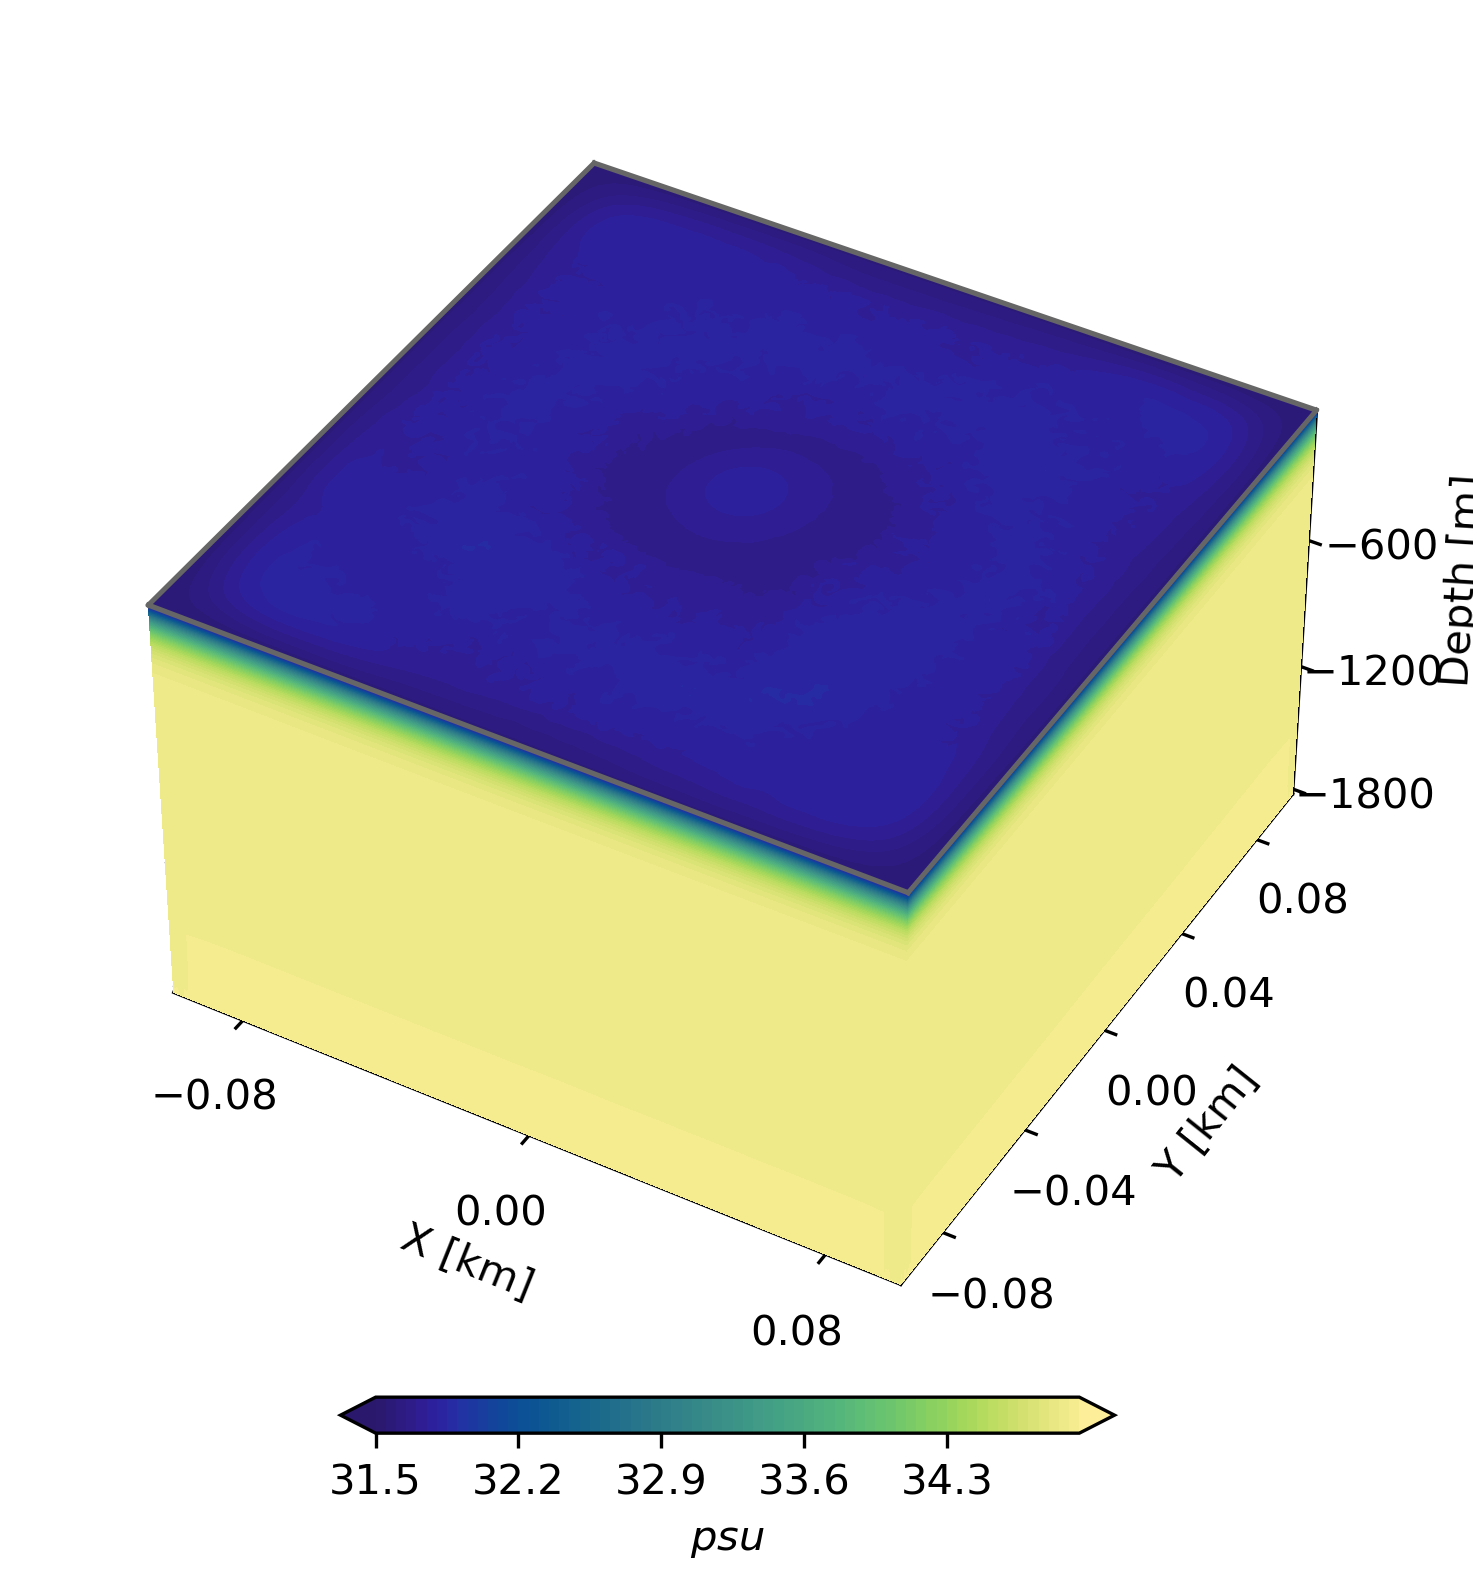

In [53]:
# Create a figure with 3D ax
fig = plt.figure(figsize=(6, 6),dpi=300)


gs = GridSpec(1, 1, figure=fig)

########################################################################
ax1 = fig.add_subplot(gs[0, 0], projection='3d', computed_zorder=False)


kw = {
    'vmin': 31.5,
    'vmax': 35,
    'levels': np.arange(31.5,35,0.05),
    'cmap': cm.cm.haline,
    'extend':'both'
}

cbar = plot3D(ax1, X/1000, Y/1000, Z, var, kw)

plt.subplots_adjust(hspace=0.25, wspace=-0.35)


cax = fig.add_axes([0.3, 0.1, 0.43, 0.02])
cb=fig.colorbar(cbar, cax=cax, orientation='horizontal',label='$psu$')
cb.ax.locator_params(nbins=5)

In [56]:
# Create a figure with 3D ax
fig = plt.figure(figsize=(12, 12),dpi=300)

kw = {
    'vmin': 31.5,
    'vmax': 35,
    'levels': np.arange(31.5,35,0.05),
    'cmap': cm.cm.haline,
    'extend':'both'
}

for time in range(0,len(data.time)):
    print(time, end='\r')
    gs = GridSpec(1, 1, figure=fig)

    ########################################################################
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')

    ax = [ax1]
    ########################################################################
    
    isel = dict(time=time)

#     ax1.text2D(0.5, 1, 'Anticyclonic', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes,fontsize=14)
#     ax4.text2D(0.5, 1, 'Cyclonic', horizontalalignment='center', verticalalignment='center', transform = ax4.transAxes,fontsize=14)

    exp_name = r"$\psi$ = 5"

    var = format_data(data, "S", isel,transpose=["yC","xC","zC"])
    var = var
    
    cbar = plot3D(ax[0], X, Y, Z, var, kw)

    ax[0].set_title(exp_name,y=0.98)


    cax = fig.add_axes([0.3, 0.1, 0.43, 0.02])
    cb=fig.colorbar(cbar, cax=cax, orientation='horizontal',label='$psu$')
    cb.ax.locator_params(nbins=5)

    # break 

    plt.subplots_adjust(hspace=0, wspace=-0.35)
    plt.savefig('./figures/animation/salinity_Eddy_simulations_{0:03}.png'.format(time), dpi=300, bbox_inches='tight')
    plt.clf()

<Figure size 3600x3600 with 0 Axes>

In [57]:
!pwd

/data/hpcdata/users/josnez/notebooks/Single_eddy
